<a href="https://colab.research.google.com/github/ArmstrongVo/VoTrongLuan.github.io/blob/main/BIOMETRICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%cd /content/drive/MyDrive/DATA FOR AI/BIOMETRICS/

/content/drive/MyDrive/DATA FOR AI/BIOMETRICS


In [5]:
#Import các thư viện 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Thư viện liên quan CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical 

from sklearn import preprocessing
from tensorflow.keras.models import load_model
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np
#Thư viện vẽ đồ thị
from matplotlib import pyplot as plt 

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)  # resize ảnh
# thiết lập dữ liệu train
training_set=train_data.flow_from_directory('/content/drive/MyDrive/DATA FOR AI/BIOMETRICS/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
# truy xuất các class có trong data train
training_set.class_indices

Found 1458 images belonging to 6 classes.


{'Doctor': 0,
 'Engineer': 1,
 'Farmer': 2,
 'Policeman': 3,
 'Singer': 4,
 'Teacher': 5}

In [6]:
#cấu trúc CNN model
model=Sequential()

# Nhân tích chập 32 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 64  
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))
# Nhân tích chập 128 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 

model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(6,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [9]:
#Complie
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(training_set,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
46/46 [==============================] - 12s 210ms/step - loss: 1.4022 - accuracy: 0.4438
Epoch 2/100
46/46 [==============================] - 10s 223ms/step - loss: 1.3596 - accuracy: 0.4479
Epoch 3/100
46/46 [==============================] - 10s 225ms/step - loss: 1.3111 - accuracy: 0.4739
Epoch 4/100
46/46 [==============================] - 9s 198ms/step - loss: 1.3337 - accuracy: 0.4698
Epoch 5/100
46/46 [==============================] - 12s 252ms/step - loss: 1.2921 - accuracy: 0.5007
Epoch 6/100
46/46 [==============================] - 10s 225ms/step - loss: 1.2806 - accuracy: 0.4966
Epoch 7/100
46/46 [==============================] - 10s 227ms/step - loss: 1.2653 - accuracy: 0.4870
Epoch 8/100
46/46 [==============================] - 9s 202ms/step - loss: 1.2453 - accuracy: 0.5199
Epoch 9/100
46/46 [==============================] - 10s 217ms/step - loss: 1.2503 - accuracy: 0.4986
Epoch 10/100
46/46 [==============================] - 10s 224ms/step - loss: 1.2309 

Train_Loss 0.2247619777917862
Train_Accuracy 0.9224965572357178


<function matplotlib.pyplot.show(close=None, block=None)>

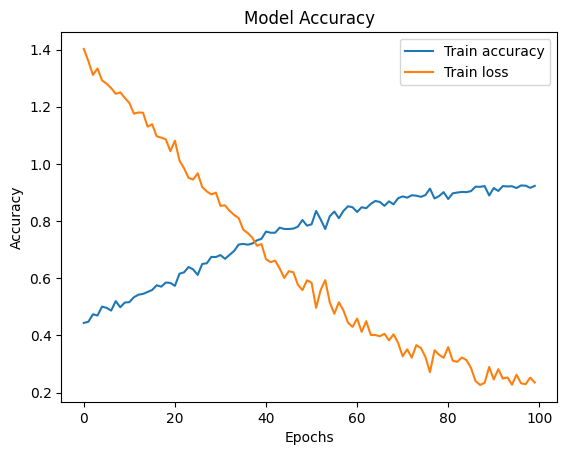

In [10]:
#Độ chính xác 
Score=model.evaluate(training_set,verbose=0)
print('Train_Loss', Score[0])
print('Train_Accuracy', Score[1])

plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train accuracy','Train loss'])
plt.show

In [11]:
model.save("BIOMETRICS.h5")

In [12]:
model_CNN=load_model('BIOMETRICS.h5')

1/1 [==============================] - 0s 18ms/step
Farmer


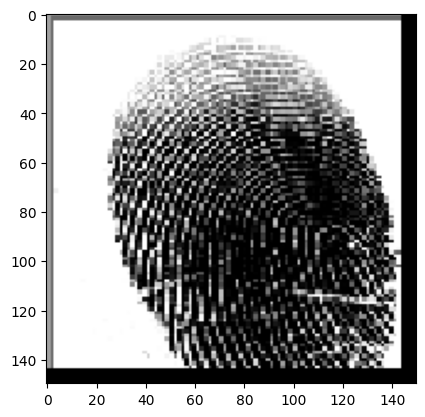

In [14]:
test='/content/drive/MyDrive/DATA FOR AI/BIOMETRICS/Test/263__F_Right_ring_finger.jpg' 
img=load_img(test,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
  
result = int(np.argmax(model_CNN.predict(img),axis =1))
class_name=['Doctor','Engineer','Farmer','Policeman','Singer','Teacher']

print(class_name[result])
plt.show()

1/1 [==============================] - 0s 19ms/step
Farmer


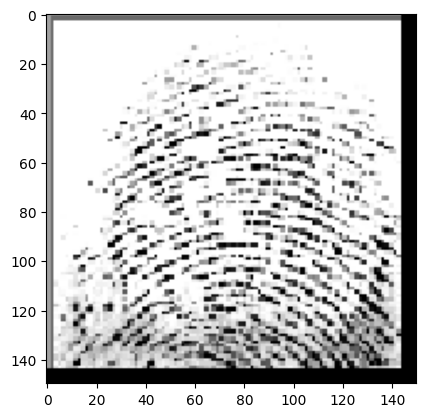

In [15]:

test='/content/drive/MyDrive/DATA FOR AI/BIOMETRICS/Test/260__M_Left_thumb_finger.jpg' 
img=load_img(test,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
  
result = int(np.argmax(model_CNN.predict(img),axis =1))
class_name=['Doctor','Engineer','Farmer','Policeman','Singer','Teacher']

print(class_name[result])
plt.show()